# Import necessary libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from qaoa_maxcut.base import QAOAMaxCut
from qaoa_maxcut.utils import calculate_max_cut_cost

# Initialize algorithm

In [2]:
algo = QAOAMaxCut(depth=7, num_simulator_repetitions=1000)

# Contruct several graphs and validate algorithm results

## Sample 1

In [3]:
graph = nx.Graph()

node_positions = [(0, 0), (0, 1), (1, 1)]

graph.add_node(0, pos=node_positions[0])
graph.add_node(1, pos=node_positions[1])
graph.add_node(2, pos=node_positions[2])

graph.add_edge(0, 1, weight=10)
graph.add_edge(0, 2, weight=10)
graph.add_edge(2, 1, weight=1)

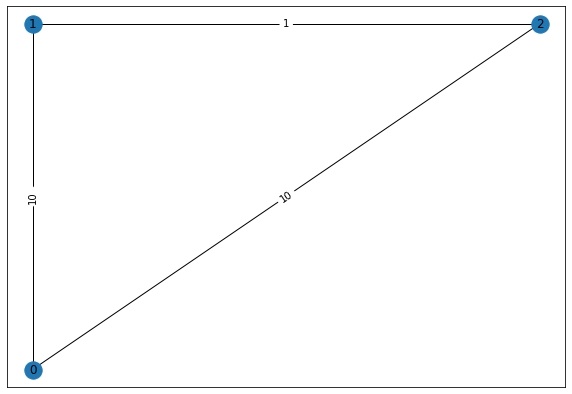

In [4]:
plt.figure(figsize=(10, 7))
nx.draw_networkx(graph, node_positions)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, node_positions, edge_labels=labels);

In [5]:
%%time

colored_vertexes, average_cost, max_cost = algo(graph)

CPU times: user 5.39 s, sys: 25 ms, total: 5.42 s
Wall time: 5.36 s


In [6]:
%%time

true_max_cut_cost = calculate_max_cut_cost(graph)

CPU times: user 33 µs, sys: 6 µs, total: 39 µs
Wall time: 41.2 µs


In [7]:
print("--- QAOA ---")
print(f"Result 'colors': {colored_vertexes}")
print(f"Average cost (best params): {average_cost}")
print(f"Maximum cost : {max_cost}")
print(f"True cost: {true_max_cut_cost}")

--- QAOA ---
Result 'colors': {0: 0, 1: 1, 2: 1}
Average cost (best params): 18.743
Maximum cost : 20.0
True cost: 20.0


## Sample 2

In [8]:
graph = nx.Graph()

graph.add_edge('a', 'b', weight=10)
graph.add_edge('a', 'c', weight=10)
graph.add_edge('b', 'c', weight=1)
graph.add_edge('a', 'd', weight=100)
graph.add_edge('d', 'b', weight=2)
graph.add_edge('d', 'c', weight=2)

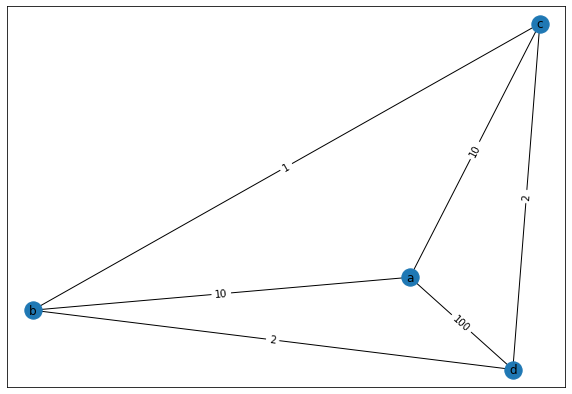

In [9]:
plt.figure(figsize=(10, 7))
node_positions = nx.spring_layout(graph)
nx.draw_networkx(graph, node_positions)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, node_positions, edge_labels=labels);

In [10]:
%%time

colored_vertexes, average_cost, max_cost = algo(graph)

CPU times: user 7.79 s, sys: 21.5 ms, total: 7.81 s
Wall time: 7.75 s


In [11]:
%%time

true_max_cut_cost = calculate_max_cut_cost(graph)

CPU times: user 150 µs, sys: 15 µs, total: 165 µs
Wall time: 169 µs


In [12]:
print("--- QAOA ---")
print(f"Result 'colors': {colored_vertexes}")
print(f"Average cost (best params): {average_cost}")
print(f"Maximum cost : {max_cost}")
print(f"True cost: {true_max_cut_cost}")

--- QAOA ---
Result 'colors': {'a': 0, 'b': 1, 'c': 1, 'd': 1}
Average cost (best params): 106.84
Maximum cost : 120.0
True cost: 120.0
